# 1000 чертей

In [15]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from scipy.linalg import eigh as sp_eigh
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA



# №2

   Composition  Drawing  Colour  Expression
0           14       14      10           6
1            8       10      10           8
2           12       16       9           8
3           14       15       6          10
4            6        8      17           0


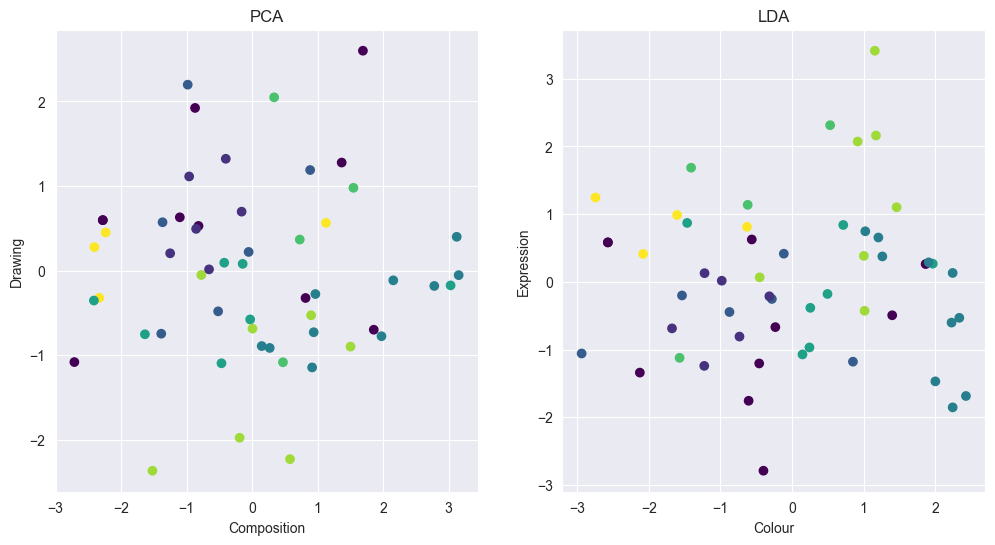

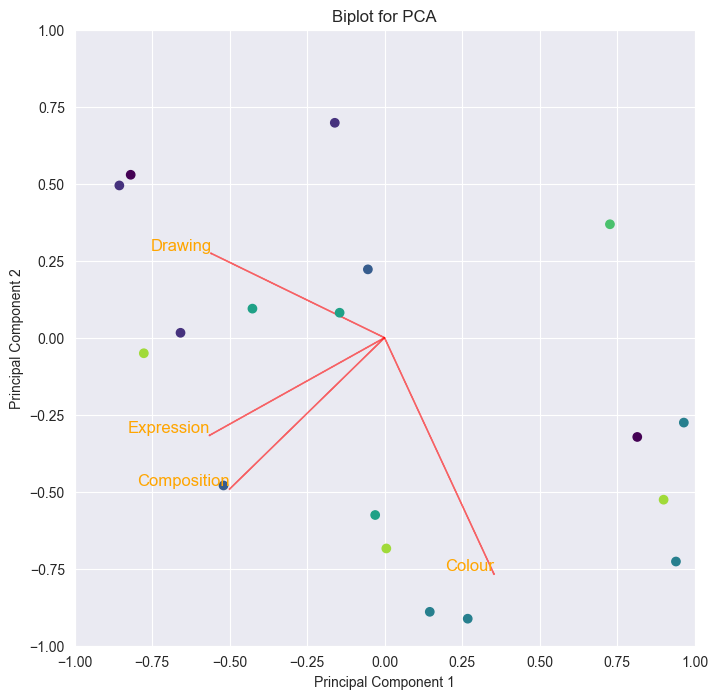

In [19]:


# Загрузка датасета
artists = pd.read_csv('artists.txt', delimiter=' ')  # Предполагается разделитель - табуляция

# Выбор признаков для анализа
X = artists.iloc[:, 1:-1]  # Исключаем первый столбец с именами и последний столбец со стилями
y = artists.iloc[:, -1]    # Целевая переменная - стили
print(X.head())  # Вывод первых нескольких строк данных X для проверки

X.reset_index(drop=True, inplace=True)  # Сброс индексов перед преобразованием


# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)  # Преобразуем X в numpy array

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Кодирование категориальных значений в переменной y
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Построение графиков
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis')
plt.title('PCA')
plt.xlabel('Composition')
plt.ylabel('Drawing')

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, cmap='viridis')
plt.title('LDA')
plt.xlabel('Colour')
plt.ylabel('Expression')

# Biplot для PCA
plt.figure(figsize=(8, 8))
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.5)
    plt.text(pc1, pc2, X.columns[i], color='orange', fontsize=12, ha='right', va='bottom')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot for PCA')

plt.show()

# №3

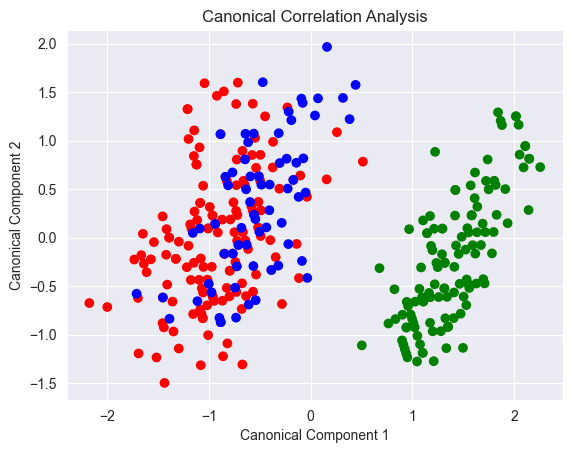

In [18]:
# Загрузка данных из файла
data = pd.read_csv('pinguins.txt', delimiter=',')

# Выбор нужных параметров для CCA
X = data[['bill_depth_mm', 'flipper_length_mm']]
Y = data[['body_mass_g', 'species']]



# Удаление строк с отсутствующими данными
X = X.dropna()
Y = Y.dropna()

# Преобразование категориального столбца 'species' в числовой формат
label_encoder = LabelEncoder()
Y['species'] = label_encoder.fit_transform(Y['species'])

# Применение CCA
cca = CCA(n_components=2)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)

# Раскрашивание точек
colors = np.where(Y['species']==0, 'red', np.where(Y['species']==1, 'blue', 'green'))

plt.scatter(X_c[:, 0], X_c[:, 1], c=colors)
plt.xlabel('Canonical Component 1')
plt.ylabel('Canonical Component 2')
plt.title('Canonical Correlation Analysis')
plt.show()

